In [1]:
import pandas as pd
import nltk
sentiment_data = pd.read_csv('D:\Tweets.csv')

In [2]:
sentiment_data.head(15)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [3]:
sentiment_data.shape

(14640, 15)

In [4]:
sentiment_df = sentiment_data.drop(sentiment_data[sentiment_data['airline_sentiment_confidence']<0.5].index, axis= 0)

In [5]:
sentiment_df.shape

(14404, 15)

In [6]:
X = sentiment_df['text']
Y = sentiment_df['airline_sentiment']

In [7]:
sentiment_data.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

<Axes: ylabel='airline'>

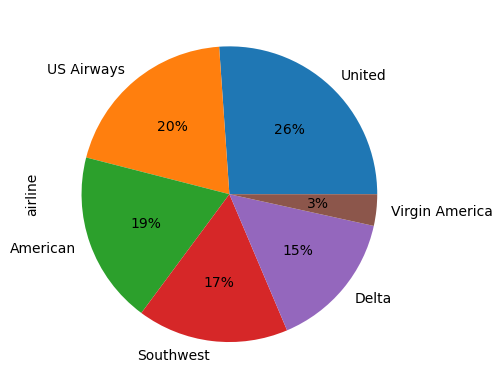

In [8]:
sentiment_data.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

<Axes: xlabel='airline'>

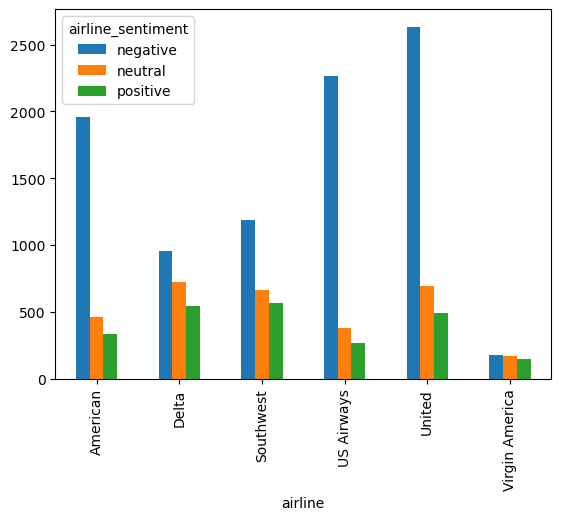

In [9]:
sentiment_data = sentiment_data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
sentiment_data.plot(kind='bar')

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to C:\Users\Prashant
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stop_words = stopwords.words('english')
punctuations = string.punctuation

In [12]:
import re
nltk.download('wordnet')

clean_data = []
for i in range(len(X)):
  text = re.sub('[^a-zA-Z]', ' ',X.iloc[i])
  text = text.lower().split()
  text = [lemmatizer.lemmatize(word) for word in text if (word not in stop_words) and (word not in punctuations)]
  text = ' '.join(text)
  clean_data.append(text)

[nltk_data] Downloading package wordnet to C:\Users\Prashant
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
clean_data

['virginamerica dhepburn said',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seat playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hat parody http co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teen',
 'virginamerica lt pretty graphic much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule still mia',
 'virginamerica excited first cross country flight lax mc

In [14]:
Y

0         neutral
2         neutral
3        negative
4        negative
5        negative
           ...   
14634    negative
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14404, dtype: object

In [15]:
sentiments = ['negative' , 'neutral', 'positive']
Y = Y.apply(lambda x: sentiments.index(x))

In [16]:
Y.head()

0    1
2    1
3    0
4    0
5    0
Name: airline_sentiment, dtype: int64

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features = 5000, stop_words = ['virginamerica','united'])
X_fit = count_vectorizer.fit_transform(clean_data).toarray()

In [18]:
X_fit.shape

(14404, 5000)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
model = MultinomialNB()

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X_fit,Y, test_size = 0.3)

In [21]:
model.fit(X_train,Y_train)

MultinomialNB()

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

classification = classification_report(Y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      2718
           1       0.61      0.49      0.54       918
           2       0.69      0.63      0.66       686

    accuracy                           0.76      4322
   macro avg       0.71      0.67      0.68      4322
weighted avg       0.75      0.76      0.75      4322

